In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

## Australian Open

### Men

In [2]:
aus_open_m = pd.read_csv('AusOpen-men-2013.csv')
aus_open_m.head()

,Player1,Round,Result,FNL1,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,...,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1
0,Lukas Lacko,1,0,0,61,35,39,18,5,1.0,...,1,3,8.0,11.0,70,3,6.0,1.0,NaN,NaN
1,Leonardo Mayer,1,1,3,61,31,39,13,13,1.0,...,7,14,NaN,NaN,80,6,6.0,6.0,NaN,NaN
2,Marcos Baghdatis,1,0,0,52,53,48,20,8,4.0,...,1,9,16.0,23.0,106,4,5.0,4.0,NaN,NaN
3,Dmitry Tursunov,1,1,3,53,39,47,24,8,6.0,...,6,9,NaN,NaN,104,6,6.0,6.0,NaN,NaN
4,Juan Monaco,1,0,1,76,63,24,12,0,4.0,...,3,12,9.0,13.0,128,6,4.0,6.0,2.0,NaN


In [3]:
list(aus_open_m)

['Player1',
 'Round',
 'Result',
 'FNL1',
 'FSP.1',
 'FSW.1',
 'SSP.1',
 'SSW.1',
 'ACE.1',
 'DBF.1',
 'WNR.1',
 'UFE.1',
 'BPC.1',
 'BPW.1',
 'NPA.1',
 'NPW.1',
 'TPW.1',
 'ST1.1',
 'ST2.1',
 'ST3.1',
 'ST4.1',
 'ST5.1']

In [4]:
# Rename columns for clarity
aus_open_m.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

In [5]:
aus_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
0,Lukas Lacko,1,0,0,61,35,39,18,5,1.0,...,1,3,8.0,11.0,70,3,6.0,1.0,NaN,NaN
1,Leonardo Mayer,1,1,3,61,31,39,13,13,1.0,...,7,14,NaN,NaN,80,6,6.0,6.0,NaN,NaN
2,Marcos Baghdatis,1,0,0,52,53,48,20,8,4.0,...,1,9,16.0,23.0,106,4,5.0,4.0,NaN,NaN
3,Dmitry Tursunov,1,1,3,53,39,47,24,8,6.0,...,6,9,NaN,NaN,104,6,6.0,6.0,NaN,NaN
4,Juan Monaco,1,0,1,76,63,24,12,0,4.0,...,3,12,9.0,13.0,128,6,4.0,6.0,2.0,NaN


In [6]:
# Fill null values
aus_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = aus_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
aus_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = aus_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)

In [7]:
# Ensure correct data type
aus_open_m['ST1'] = aus_open_m['ST1'].astype(np.int)
aus_open_m['ST2'] = aus_open_m['ST2'].astype(np.int)
aus_open_m['ST3'] = aus_open_m['ST3'].astype(np.int)
aus_open_m['ST4'] = aus_open_m['ST4'].astype(np.int)
aus_open_m['ST5'] = aus_open_m['ST5'].astype(np.int)

In [8]:
# Create total games (tot_gms) feature
aus_open_m['tot_gms'] = aus_open_m['ST1'] + aus_open_m['ST2'] + aus_open_m['ST3'] + aus_open_m['ST4'] + aus_open_m['ST5']
aus_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5,tot_gms
0,Lukas Lacko,1,0,0,61,35,39,18,5,1.0,...,3,8.0,11.0,70,3,6,1,0,0,10
1,Leonardo Mayer,1,1,3,61,31,39,13,13,1.0,...,14,0.0,0.0,80,6,6,6,0,0,18
2,Marcos Baghdatis,1,0,0,52,53,48,20,8,4.0,...,9,16.0,23.0,106,4,5,4,0,0,13
3,Dmitry Tursunov,1,1,3,53,39,47,24,8,6.0,...,9,0.0,0.0,104,6,6,6,0,0,18
4,Juan Monaco,1,0,1,76,63,24,12,0,4.0,...,12,9.0,13.0,128,6,4,6,2,0,18


In [9]:
# Add dummies
aus_open_m['male'] = 1
aus_open_m['female'] = 0
aus_open_m['AusOp'] = 1
aus_open_m['FrOp'] = 0
aus_open_m['Wim'] = 0
aus_open_m['USOp'] = 0
aus_open_m['HrdCt'] = 1
aus_open_m['ClCt'] = 0
aus_open_m['GrsCt'] = 0
aus_open_m['tourn'] = 'AOM'
aus_open_m['surface'] = 'HCM'

# Create control factor (ctrl_fact) feature
aus_open_m['ctrl_fact'] = aus_open_m['ACE'] + aus_open_m['DBF'] + aus_open_m['WNR']+aus_open_m['UFE']

aus_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,tourn,surface,ctrl_fact
0,Lukas Lacko,1,0,0,61,35,39,18,5,1.0,...,1,0,0,0,1,0,0,AOM,HCM,52.0
1,Leonardo Mayer,1,1,3,61,31,39,13,13,1.0,...,1,0,0,0,1,0,0,AOM,HCM,28.0
2,Marcos Baghdatis,1,0,0,52,53,48,20,8,4.0,...,1,0,0,0,1,0,0,AOM,HCM,99.0
3,Dmitry Tursunov,1,1,3,53,39,47,24,8,6.0,...,1,0,0,0,1,0,0,AOM,HCM,28.0
4,Juan Monaco,1,0,1,76,63,24,12,0,4.0,...,1,0,0,0,1,0,0,AOM,HCM,55.0


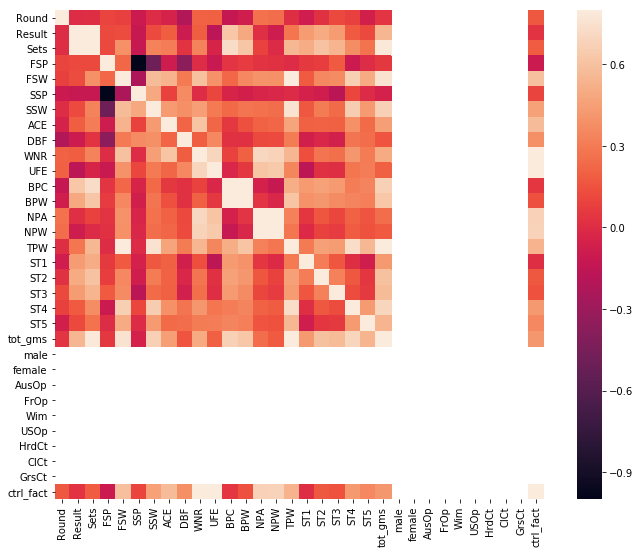

In [10]:
corrmat = aus_open_m.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

NPA and NPW missing some

### Women

In [11]:
aus_open_w = pd.read_csv('AusOpen-women-2013.csv')
aus_open_w.head()

,Player1,Round,Result,FNL1,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,...,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1
0,Serena Williams,1,1,2.0,59,20,41,8,6.0,2.0,...,5.0,10.0,10.0,11.0,58,6.0,6.0,NaN,NaN,NaN
1,Vesna Dolonc,1,1,2.0,65,33,35,10,7.0,4.0,...,5.0,10.0,NaN,NaN,78,2.0,6.0,6.0,NaN,NaN
2,Pauline Parmentier,1,0,0.0,63,16,37,4,3.0,6.0,...,0.0,2.0,NaN,NaN,37,0.0,1.0,NaN,NaN,NaN
3,Heather Watson,1,0,1.0,61,41,39,19,8.0,3.0,...,4.0,7.0,10.0,13.0,88,5.0,6.0,3.0,NaN,NaN
4,Samantha Stosur,1,1,2.0,65,28,35,11,6.0,1.0,...,7.0,10.0,7.0,10.0,74,6.0,6.0,NaN,NaN,NaN


In [12]:
aus_open_w.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']
aus_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
0,Serena Williams,1,1,2.0,59,20,41,8,6.0,2.0,...,5.0,10.0,10.0,11.0,58,6.0,6.0,NaN,NaN,NaN
1,Vesna Dolonc,1,1,2.0,65,33,35,10,7.0,4.0,...,5.0,10.0,NaN,NaN,78,2.0,6.0,6.0,NaN,NaN
2,Pauline Parmentier,1,0,0.0,63,16,37,4,3.0,6.0,...,0.0,2.0,NaN,NaN,37,0.0,1.0,NaN,NaN,NaN
3,Heather Watson,1,0,1.0,61,41,39,19,8.0,3.0,...,4.0,7.0,10.0,13.0,88,5.0,6.0,3.0,NaN,NaN
4,Samantha Stosur,1,1,2.0,65,28,35,11,6.0,1.0,...,7.0,10.0,7.0,10.0,74,6.0,6.0,NaN,NaN,NaN


In [13]:
aus_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = aus_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
aus_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = aus_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)

In [14]:
aus_open_w['ST1'] = aus_open_w['ST1'].astype(np.int)
aus_open_w['ST2'] = aus_open_w['ST2'].astype(np.int)
aus_open_w['ST3'] = aus_open_w['ST3'].astype(np.int)
aus_open_w['ST4'] = aus_open_w['ST4'].astype(np.int)
aus_open_w['ST5'] = aus_open_w['ST5'].astype(np.int)

In [15]:
aus_open_w['tot_gms'] = aus_open_w['ST1'] + aus_open_w['ST2'] + aus_open_w['ST3'] + aus_open_w['ST4'] + aus_open_w['ST5']
aus_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5,tot_gms
0,Serena Williams,1,1,2.0,59,20,41,8,6.0,2.0,...,10.0,10.0,11.0,58,6,6,0,0,0,12
1,Vesna Dolonc,1,1,2.0,65,33,35,10,7.0,4.0,...,10.0,0.0,0.0,78,2,6,6,0,0,14
2,Pauline Parmentier,1,0,0.0,63,16,37,4,3.0,6.0,...,2.0,0.0,0.0,37,0,1,0,0,0,1
3,Heather Watson,1,0,1.0,61,41,39,19,8.0,3.0,...,7.0,10.0,13.0,88,5,6,3,0,0,14
4,Samantha Stosur,1,1,2.0,65,28,35,11,6.0,1.0,...,10.0,7.0,10.0,74,6,6,0,0,0,12


In [16]:
aus_open_w['male'] = 0
aus_open_w['female'] = 1
aus_open_w['AusOp'] = 1
aus_open_w['FrOp'] = 0
aus_open_w['Wim'] = 0
aus_open_w['USOp'] = 0
aus_open_w['HrdCt'] = 1
aus_open_w['ClCt'] = 0
aus_open_w['GrsCt'] = 0
aus_open_w['tourn'] = 'AOW'
aus_open_w['surface'] = 'HCW'

aus_open_w['ctrl_fact'] = aus_open_w['ACE'] + aus_open_w['DBF'] + aus_open_w['WNR']+aus_open_w['UFE']

aus_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,tourn,surface,ctrl_fact
0,Serena Williams,1,1,2.0,59,20,41,8,6.0,2.0,...,1,0,0,0,1,0,0,AOW,HCW,56.0
1,Vesna Dolonc,1,1,2.0,65,33,35,10,7.0,4.0,...,1,0,0,0,1,0,0,AOW,HCW,22.0
2,Pauline Parmentier,1,0,0.0,63,16,37,4,3.0,6.0,...,1,0,0,0,1,0,0,AOW,HCW,18.0
3,Heather Watson,1,0,1.0,61,41,39,19,8.0,3.0,...,1,0,0,0,1,0,0,AOW,HCW,83.0
4,Samantha Stosur,1,1,2.0,65,28,35,11,6.0,1.0,...,1,0,0,0,1,0,0,AOW,HCW,44.0


inconsistent NPA and NPW

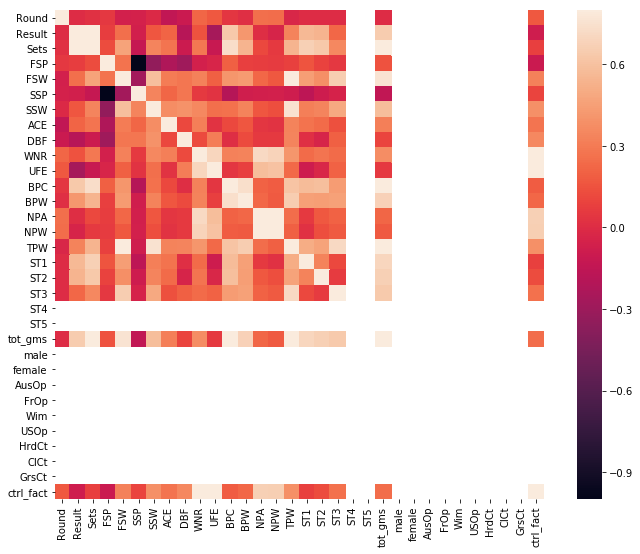

In [17]:
corrmat = aus_open_w.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## French Open

### Men

In [18]:
fr_open_m = pd.read_csv('FrenchOpen-men-2013.csv')
fr_open_m.head()

,Player1,Round,Result,FNL.1,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,...,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1
0,Pablo Carreno-Busta,1,0,0,62,27,38,11,1,3.0,...,1,3,9,20,50,2,2,3.0,NaN,NaN
1,Somdev Devvarman,1,1,3,62,54,38,22,7,3.0,...,5,8,12,21,120,6,6,7.0,NaN,NaN
2,Tobias Kamke,1,1,3,62,53,38,15,4,6.0,...,10,22,14,32,140,6,6,3.0,0.0,6.0
3,Julien Benneteau,1,1,3,72,87,28,19,14,2.0,...,4,13,14,30,163,7,6,5.0,7.0,NaN
4,Lukas Lacko,1,0,0,52,31,48,22,4,4.0,...,1,1,3,5,72,3,4,4.0,NaN,NaN


In [19]:
fr_open_m.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

fr_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = fr_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
fr_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = fr_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


fr_open_m['ST1'] = fr_open_m['ST1'].astype(np.int)
fr_open_m['ST2'] = fr_open_m['ST2'].astype(np.int)
fr_open_m['ST3'] = fr_open_m['ST3'].astype(np.int)
fr_open_m['ST4'] = fr_open_m['ST4'].astype(np.int)
fr_open_m['ST5'] = fr_open_m['ST5'].astype(np.int)

fr_open_m['tot_gms'] = fr_open_m['ST1'] + fr_open_m['ST2'] + fr_open_m['ST3'] + fr_open_m['ST4'] + fr_open_m['ST5']

fr_open_m['male'] = 1
fr_open_m['female'] = 0
fr_open_m['AusOp'] = 0
fr_open_m['FrOp'] = 1
fr_open_m['Wim'] = 0
fr_open_m['USOp'] = 0
fr_open_m['HrdCt'] = 0
fr_open_m['ClCt'] = 1
fr_open_m['GrsCt'] = 0
fr_open_m['tourn'] = 'FOM'
fr_open_m['surface'] = 'CCM'

fr_open_m['ctrl_fact'] = fr_open_m['ACE'] + fr_open_m['DBF'] + fr_open_m['WNR']+fr_open_m['UFE']

fr_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,tourn,surface,ctrl_fact
0,Pablo Carreno-Busta,1,0,0,62,27,38,11,1,3.0,...,0,1,0,0,0,1,0,FOM,CCM,45.0
1,Somdev Devvarman,1,1,3,62,54,38,22,7,3.0,...,0,1,0,0,0,1,0,FOM,CCM,56.0
2,Tobias Kamke,1,1,3,62,53,38,15,4,6.0,...,0,1,0,0,0,1,0,FOM,CCM,107.0
3,Julien Benneteau,1,1,3,72,87,28,19,14,2.0,...,0,1,0,0,0,1,0,FOM,CCM,91.0
4,Lukas Lacko,1,0,0,52,31,48,22,4,4.0,...,0,1,0,0,0,1,0,FOM,CCM,53.0


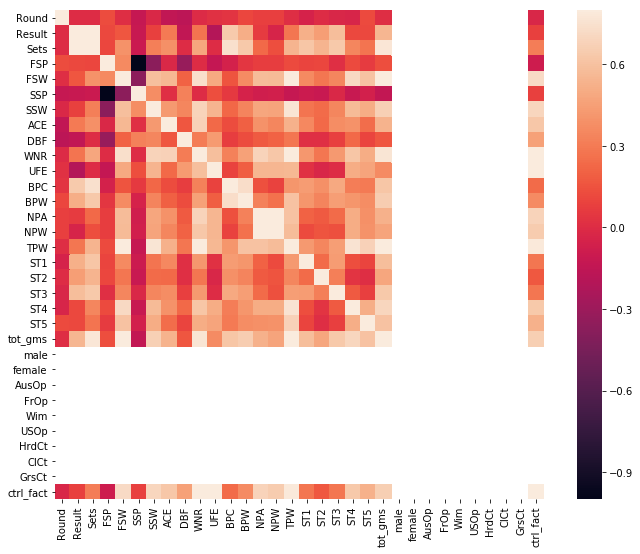

In [20]:
corrmat = fr_open_m.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Women

In [21]:
fr_open_w = pd.read_csv('FrenchOpen-women-2013.csv')

fr_open_w.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

fr_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = fr_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
fr_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = fr_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


fr_open_w['ST1'] = fr_open_w['ST1'].astype(np.int)
fr_open_w['ST2'] = fr_open_w['ST2'].astype(np.int)
fr_open_w['ST3'] = fr_open_w['ST3'].astype(np.int)
fr_open_w['ST4'] = fr_open_w['ST4'].astype(np.int)
fr_open_w['ST5'] = fr_open_w['ST5'].astype(np.int)

fr_open_w['tot_gms'] = fr_open_w['ST1'] + fr_open_w['ST2'] + fr_open_w['ST3'] + fr_open_w['ST4'] + fr_open_w['ST5']

fr_open_w['male'] = 0
fr_open_w['female'] = 1
fr_open_w['AusOp'] = 0
fr_open_w['FrOp'] = 1
fr_open_w['Wim'] = 0
fr_open_w['USOp'] = 0
fr_open_w['HrdCt'] = 0
fr_open_w['ClCt'] = 1
fr_open_w['GrsCt'] = 0
fr_open_w['tourn'] = 'FOW'
fr_open_w['surface'] = 'CCW'

fr_open_w['ctrl_fact'] = fr_open_w['ACE'] + fr_open_w['DBF'] + fr_open_w['WNR']+fr_open_w['UFE']

fr_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,tourn,surface,ctrl_fact
0,Su-Wei Hsieh,1,0,0,62,18,38,5,0.0,3.0,...,0,1,0,0,0,1,0,FOW,CCW,19.0
1,Eugenie Bouchard,1,1,2,57,23,43,17,3.0,1.0,...,0,1,0,0,0,1,0,FOW,CCW,62.0
2,Jie Zheng,1,1,2,76,30,24,5,1.0,0.0,...,0,1,0,0,0,1,0,FOW,CCW,39.0
3,Tamira Paszek,1,0,0,59,16,41,8,2.0,6.0,...,0,1,0,0,0,1,0,FOW,CCW,67.0
4,Karin Knapp,1,0,0,57,18,43,13,0.0,3.0,...,0,1,0,0,0,1,0,FOW,CCW,45.0


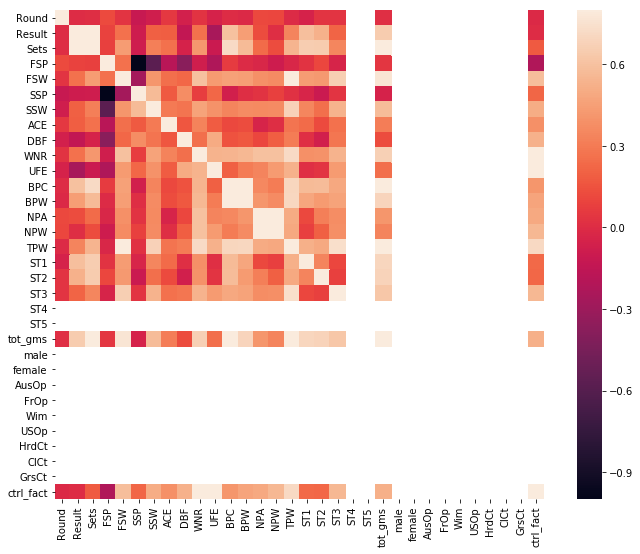

In [22]:
corrmat = fr_open_w.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Wimbledon

### Men

In [23]:
wim_open_m = pd.read_csv('Wimbledon-men-2013.csv')

wim_open_m.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

wim_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = wim_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
wim_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = wim_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


wim_open_m['ST1'] = wim_open_m['ST1'].astype(np.int)
wim_open_m['ST2'] = wim_open_m['ST2'].astype(np.int)
wim_open_m['ST3'] = wim_open_m['ST3'].astype(np.int)
wim_open_m['ST4'] = wim_open_m['ST4'].astype(np.int)
wim_open_m['ST5'] = wim_open_m['ST5'].astype(np.int)

wim_open_m['tot_gms'] = wim_open_m['ST1'] + wim_open_m['ST2'] + wim_open_m['ST3'] + wim_open_m['ST4'] + wim_open_m['ST5']

wim_open_m['male'] = 1
wim_open_m['female'] = 0
wim_open_m['AusOp'] = 0
wim_open_m['FrOp'] = 0
wim_open_m['Wim'] = 1
wim_open_m['USOp'] = 0
wim_open_m['HrdCt'] = 0
wim_open_m['ClCt'] = 0
wim_open_m['GrsCt'] = 1
wim_open_m['tourn'] = 'WM'
wim_open_m['surface'] = 'GCM'

wim_open_m['ctrl_fact'] = wim_open_m['ACE'] + wim_open_m['DBF'] + wim_open_m['WNR']+wim_open_m['UFE']

wim_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,tourn,surface,ctrl_fact
0,B.Becker,1,0,0,59,29,41,14,5,1.0,...,0,0,1,0,0,0,1,WM,GCM,50.0
1,J.Ward,1,0,1,62,77,38,35,18,4.0,...,0,0,1,0,0,0,1,WM,GCM,110.0
2,N.Mahut,1,1,3,72,44,28,10,17,3.0,...,0,0,1,0,0,0,1,WM,GCM,79.0
3,T.Robredo,1,1,3,77,40,23,12,6,0.0,...,0,0,1,0,0,0,1,WM,GCM,42.0
4,R.Haase,1,0,0,68,61,32,15,7,2.0,...,0,0,1,0,0,0,1,WM,GCM,70.0


missing TPW

### Women

In [24]:
wim_open_w = pd.read_csv('Wimbledon-women-2013.csv')

wim_open_w.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

wim_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = wim_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
wim_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = wim_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


wim_open_w['ST1'] = wim_open_w['ST1'].astype(np.int)
wim_open_w['ST2'] = wim_open_w['ST2'].astype(np.int)
wim_open_w['ST3'] = wim_open_w['ST3'].astype(np.int)
wim_open_w['ST4'] = wim_open_w['ST4'].astype(np.int)
wim_open_w['ST5'] = wim_open_w['ST5'].astype(np.int)

wim_open_w['tot_gms'] = wim_open_w['ST1'] + wim_open_w['ST2'] + wim_open_w['ST3'] + wim_open_w['ST4'] + wim_open_w['ST5']

wim_open_w['male'] = 0
wim_open_w['female'] = 1
wim_open_w['AusOp'] = 0
wim_open_w['FrOp'] = 0
wim_open_w['Wim'] = 1
wim_open_w['USOp'] = 0
wim_open_w['HrdCt'] = 0
wim_open_w['ClCt'] = 0
wim_open_w['GrsCt'] = 1
wim_open_w['tourn'] = 'WW'
wim_open_w['surface'] = 'GCW'

wim_open_w['ctrl_fact'] = wim_open_w['ACE'] + wim_open_w['DBF'] + wim_open_w['WNR']+wim_open_w['UFE']

wim_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,tourn,surface,ctrl_fact
0,M.Koehler,1,0,0,60,21,40,8,2.0,4,...,0,0,1,0,0,0,1,WW,GCW,43.0
1,E.Baltacha,1,0,0,69,23,31,6,0.0,0,...,0,0,1,0,0,0,1,WW,GCW,22.0
2,S-W.Hsieh,1,1,2,63,17,37,10,1.0,1,...,0,0,1,0,0,0,1,WW,GCW,38.0
3,A.Cornet,1,1,2,57,36,43,21,4.0,4,...,0,0,1,0,0,0,1,WW,GCW,73.0
4,Y.Putintseva,1,0,0,73,34,27,12,2.0,2,...,0,0,1,0,0,0,1,WW,GCW,56.0


missing TPW

## US Open

### Men

In [25]:
us_open_m = pd.read_csv('USOpen-men-2013.csv')

us_open_m.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

us_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = us_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
us_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = us_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


us_open_m['ST1'] = us_open_m['ST1'].astype(np.int)
us_open_m['ST2'] = us_open_m['ST2'].astype(np.int)
us_open_m['ST3'] = us_open_m['ST3'].astype(np.int)
us_open_m['ST4'] = us_open_m['ST4'].astype(np.int)
us_open_m['ST5'] = us_open_m['ST5'].astype(np.int)

us_open_m['tot_gms'] = us_open_m['ST1'] + us_open_m['ST2'] + us_open_m['ST3'] + us_open_m['ST4'] + us_open_m['ST5']

us_open_m['male'] = 1
us_open_m['female'] = 0
us_open_m['AusOp'] = 0
us_open_m['FrOp'] = 0
us_open_m['Wim'] = 0
us_open_m['USOp'] = 1
us_open_m['HrdCt'] = 1
us_open_m['ClCt'] = 0
us_open_m['GrsCt'] = 0
us_open_m['tourn'] = 'UOM'
us_open_m['surface'] = 'HCM'

us_open_m['ctrl_fact'] = us_open_m['ACE'] + us_open_m['DBF'] + us_open_m['WNR']+us_open_m['UFE']

us_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,tourn,surface,ctrl_fact
0,Richard Gasquet,1,1,3,63,45,37,16,7,7,...,0,0,0,1,1,0,0,UOM,HCM,NaN
1,Stephane Robert,1,1,3,61,44,39,19,3,2,...,0,0,0,1,1,0,0,UOM,HCM,NaN
2,Jan-Lennard Struff,1,0,2,55,61,45,32,11,13,...,0,0,0,1,1,0,0,UOM,HCM,NaN
3,Aljaz Bedene,1,0,1,52,41,48,19,13,8,...,0,0,0,1,1,0,0,UOM,HCM,NaN
4,Feliciano Lopez,1,1,3,58,54,42,30,21,3,...,0,0,0,1,1,0,0,UOM,HCM,NaN


missing WIN and UFE

In [26]:
# Find median WNR from Aus Open Men
aus_open_m['WNR'].median()

32.0

In [27]:
# Use above value for US Open Men
us_open_m['WNR'] = 32.0

In [28]:
# Find median UFE value from Aus Open Men
aus_open_m['UFE'].median()

33.0

In [29]:
# Use above value for US Open Men
us_open_m['UFE'] = 33.0

In [30]:
# Check for complete data
us_open_m.iloc[0]

Player       Richard Gasquet
Round                      1
Result                     1
Sets                       3
FSP                       63
FSW                       45
SSP                       37
SSW                       16
ACE                        7
DBF                        7
WNR                       32
UFE                       33
BPC                        5
BPW                       16
NPA                       18
NPW                       25
TPW                      106
ST1                        6
ST2                        6
ST3                        6
ST4                        0
ST5                        0
tot_gms                   18
male                       1
female                     0
AusOp                      0
FrOp                       0
Wim                        0
USOp                       1
HrdCt                      1
ClCt                       0
GrsCt                      0
tourn                    UOM
surface                  HCM
ctrl_fact     

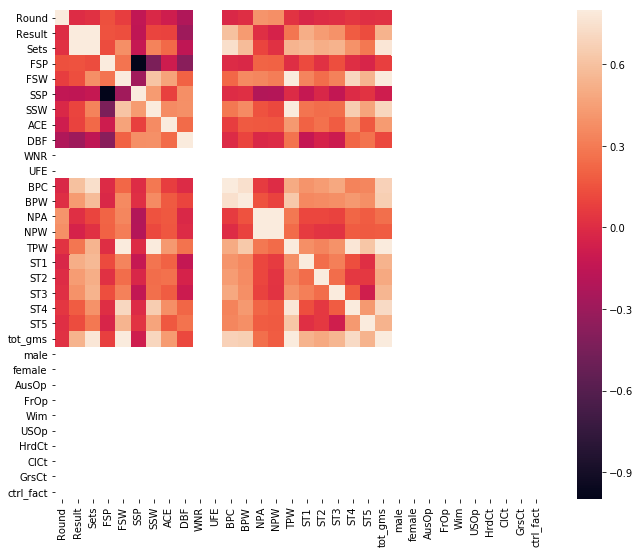

In [31]:
corrmat = us_open_m.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [32]:
# Adde ctrl_fact
us_open_m['ctrl_fact'] = us_open_m['ACE'] + us_open_m['DBF'] + us_open_m['WNR']+us_open_m['UFE']

In [33]:
# Data complete
us_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,tourn,surface,ctrl_fact
0,Richard Gasquet,1,1,3,63,45,37,16,7,7,...,0,0,0,1,1,0,0,UOM,HCM,79.0
1,Stephane Robert,1,1,3,61,44,39,19,3,2,...,0,0,0,1,1,0,0,UOM,HCM,70.0
2,Jan-Lennard Struff,1,0,2,55,61,45,32,11,13,...,0,0,0,1,1,0,0,UOM,HCM,89.0
3,Aljaz Bedene,1,0,1,52,41,48,19,13,8,...,0,0,0,1,1,0,0,UOM,HCM,86.0
4,Feliciano Lopez,1,1,3,58,54,42,30,21,3,...,0,0,0,1,1,0,0,UOM,HCM,89.0


### Women

In [34]:
us_open_w = pd.read_csv('USOpen-women-2013.csv')

us_open_w.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

us_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = us_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
us_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = us_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


us_open_w['ST1'] = us_open_w['ST1'].astype(np.int)
us_open_w['ST2'] = us_open_w['ST2'].astype(np.int)
us_open_w['ST3'] = us_open_w['ST3'].astype(np.int)
us_open_w['ST4'] = us_open_w['ST4'].astype(np.int)
us_open_w['ST5'] = us_open_w['ST5'].astype(np.int)

us_open_w['tot_gms'] = us_open_w['ST1'] + us_open_w['ST2'] + us_open_w['ST3'] + us_open_w['ST4'] + us_open_w['ST5']

us_open_w['male'] = 0
us_open_w['female'] = 1
us_open_w['AusOp'] = 0
us_open_w['FrOp'] = 0
us_open_w['Wim'] = 0
us_open_w['USOp'] = 1
us_open_w['HrdCt'] = 1
us_open_w['ClCt'] = 0
us_open_w['GrsCt'] = 0
us_open_w['tourn'] = 'UOW'
us_open_w['surface'] = 'HCW'

us_open_w['TPW'] = us_open_w['TPW'].fillna(aus_open_m['TPW'].median)

us_open_w['ctrl_fact'] = us_open_w['ACE'] + us_open_w['DBF'] + us_open_w['WNR']+us_open_w['UFE']

us_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,tourn,surface,ctrl_fact
0,S Williams,7,1,2,57,44,43,20,9,5,...,0,0,0,1,1,0,0,UOW,HCW,85
1,F Pennetta,6,0,0,44,12,56,7,1,3,...,0,0,0,1,1,0,0,UOW,HCW,46
2,S Williams,6,1,2,63,26,37,9,4,1,...,0,0,0,1,1,0,0,UOW,HCW,44
3,R Vinci,5,0,0,60,21,40,7,0,3,...,0,0,0,1,1,0,0,UOW,HCW,45
4,D Hantuchova,5,0,0,58,14,42,5,3,3,...,0,0,0,1,1,0,0,UOW,HCW,43


missing TPW

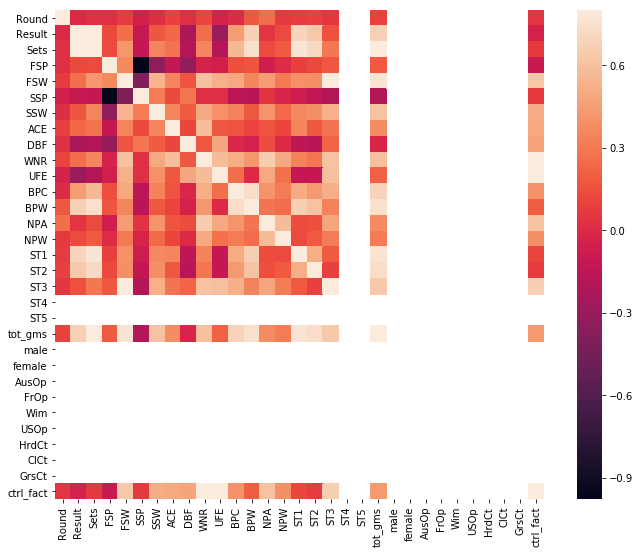

In [35]:
corrmat = us_open_w.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## All Together Now!

In [36]:
# Concatenate all tournaments into one DataFrame
all_tournaments = [aus_open_m, aus_open_w, fr_open_m, fr_open_w, wim_open_m, wim_open_w, us_open_m, us_open_w]
matches = pd.concat(all_tournaments).reset_index(drop=True)

matches

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,tourn,surface,ctrl_fact
0,Lukas Lacko,1,0,0.0,61,35,39,18,5.0,1.0,...,1,0,0,0,1,0,0,AOM,HCM,52.0
1,Leonardo Mayer,1,1,3.0,61,31,39,13,13.0,1.0,...,1,0,0,0,1,0,0,AOM,HCM,28.0
2,Marcos Baghdatis,1,0,0.0,52,53,48,20,8.0,4.0,...,1,0,0,0,1,0,0,AOM,HCM,99.0
3,Dmitry Tursunov,1,1,3.0,53,39,47,24,8.0,6.0,...,1,0,0,0,1,0,0,AOM,HCM,28.0
4,Juan Monaco,1,0,1.0,76,63,24,12,0.0,4.0,...,1,0,0,0,1,0,0,AOM,HCM,55.0
5,Santiago Giraldo,1,0,1.0,65,51,35,22,9.0,3.0,...,1,0,0,0,1,0,0,AOM,HCM,88.0
6,Dudi Sela,1,0,2.0,68,73,32,24,5.0,3.0,...,1,0,0,0,1,0,0,AOM,HCM,99.0
7,Fabio Fognini,1,1,2.0,47,18,53,15,3.0,4.0,...,1,0,0,0,1,0,0,AOM,HCM,59.0
8,David Guez,1,0,0.0,64,26,36,12,3.0,0.0,...,1,0,0,0,1,0,0,AOM,HCM,62.0
9,Nikolay Davydenko,1,1,3.0,77,76,23,11,6.0,4.0,...,1,0,0,0,1,0,0,AOM,HCM,20.0


In [37]:
list(matches)

['Player',
 'Round',
 'Result',
 'Sets',
 'FSP',
 'FSW',
 'SSP',
 'SSW',
 'ACE',
 'DBF',
 'WNR',
 'UFE',
 'BPC',
 'BPW',
 'NPA',
 'NPW',
 'TPW',
 'ST1',
 'ST2',
 'ST3',
 'ST4',
 'ST5',
 'tot_gms',
 'male',
 'female',
 'AusOp',
 'FrOp',
 'Wim',
 'USOp',
 'HrdCt',
 'ClCt',
 'GrsCt',
 'tourn',
 'surface',
 'ctrl_fact']

In [38]:
matches.isnull().sum()

Player         0
Round          0
Result         0
Sets           0
FSP            0
FSW            0
SSP            0
SSW            0
ACE            0
DBF            0
WNR            0
UFE            0
BPC            0
BPW            0
NPA            0
NPW            0
TPW          472
ST1            0
ST2            0
ST3            0
ST4            0
ST5            0
tot_gms        0
male           0
female         0
AusOp          0
FrOp           0
Wim            0
USOp           0
HrdCt          0
ClCt           0
GrsCt          0
tourn          0
surface        0
ctrl_fact      0
dtype: int64

In [39]:
matches['Round'] = matches['Round'].astype(np.int)
matches['Result'] = matches['Result'].astype(np.int)
matches['Sets'] = matches['Sets'].astype(np.int)
matches['FSP'] = matches['FSP'].astype(np.int)
matches['FSW'] = matches['FSW'].astype(np.int)
matches['SSP'] = matches['SSP'].astype(np.int)
matches['SSW'] = matches['SSW'].astype(np.int)
matches['ACE'] = matches['ACE'].astype(np.int)
matches['DBF'] = matches['DBF'].astype(np.int)
matches['WNR'] = matches['WNR'].astype(np.int)
matches['UFE'] = matches['UFE'].astype(np.int)
matches['BPC'] = matches['BPC'].astype(np.int)
matches['BPW'] = matches['BPW'].astype(np.int)
matches['NPA'] = matches['NPA'].astype(np.int)
matches['NPW'] = matches['NPW'].astype(np.int)
#matches['TPW'] = matches['TPW'].astype(np.int)

In [40]:
# Add rate stat features
matches['ctrl_rate'] = (matches['ctrl_fact']/matches['tot_gms']).round(4)
matches['ace_rate'] = (matches['ACE']/matches['tot_gms']).round(4)
matches['dbf_rate'] = (matches['DBF']/matches['tot_gms']).round(4)
matches['wnr_rate'] = (matches['WNR']/matches['tot_gms']).round(4)
matches['ufe_rate'] = (matches['UFE']/matches['tot_gms']).round(4)

In [41]:
matches.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,ClCt,GrsCt,tourn,surface,ctrl_fact,ctrl_rate,ace_rate,dbf_rate,wnr_rate,ufe_rate
0,Lukas Lacko,1,0,0,61,35,39,18,5,1,...,0,0,AOM,HCM,52.0,5.2000,0.5000,0.1000,1.7000,2.9000
1,Leonardo Mayer,1,1,3,61,31,39,13,13,1,...,0,0,AOM,HCM,28.0,1.5556,0.7222,0.0556,0.7222,0.0556
2,Marcos Baghdatis,1,0,0,52,53,48,20,8,4,...,0,0,AOM,HCM,99.0,7.6154,0.6154,0.3077,2.8462,3.8462
3,Dmitry Tursunov,1,1,3,53,39,47,24,8,6,...,0,0,AOM,HCM,28.0,1.5556,0.4444,0.3333,0.4444,0.3333
4,Juan Monaco,1,0,1,76,63,24,12,0,4,...,0,0,AOM,HCM,55.0,3.0556,0.0000,0.2222,0.8889,1.9444


# Exploration

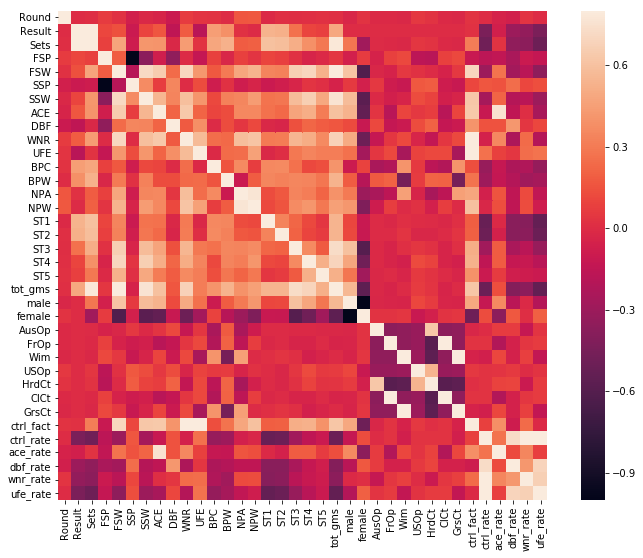

In [42]:
corrmat = matches.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

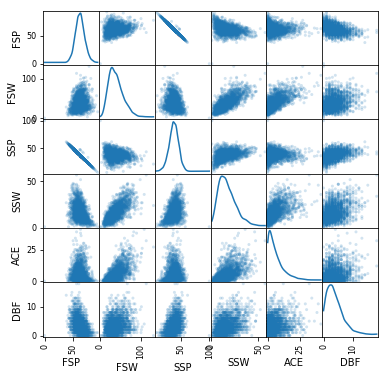

In [43]:
from pandas.plotting import scatter_matrix
serve_df = matches[['FSP', 'FSW', 'SSP', 'SSW', 'ACE', 'DBF']]
scatter_matrix(serve_df, alpha=0.2, figsize=(6, 6), diagonal='kde');

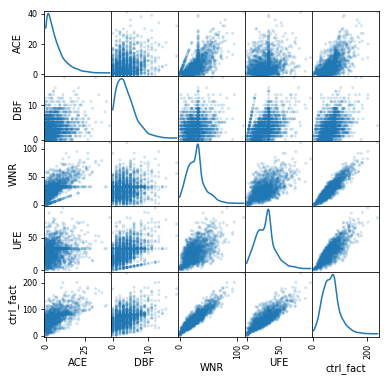

In [44]:
ctrl_df = matches[['ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
scatter_matrix(ctrl_df, alpha=0.2, figsize=(6, 6), diagonal='kde');

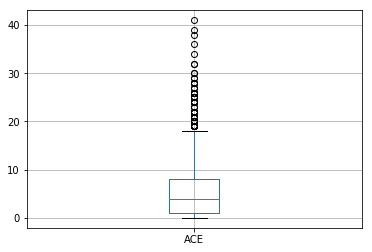

In [45]:
matches.boxplot('ACE')

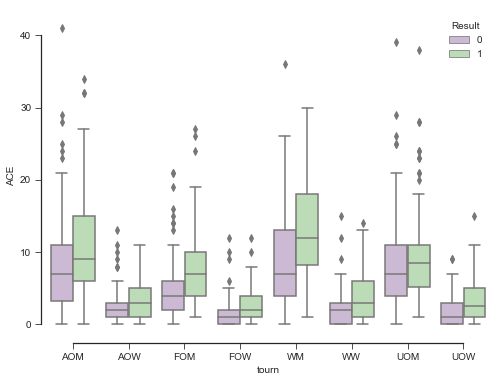

In [46]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 6)
sns.boxplot(x="tourn", y="ACE", hue="Result", data=matches, palette="PRGn")
sns.despine(offset=4, trim=True)

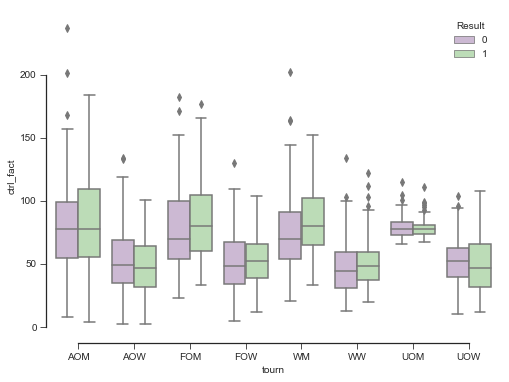

In [47]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 6)
sns.boxplot(x="tourn", y="ctrl_fact", hue="Result", data=matches, palette="PRGn")
sns.despine(offset=4, trim=True)

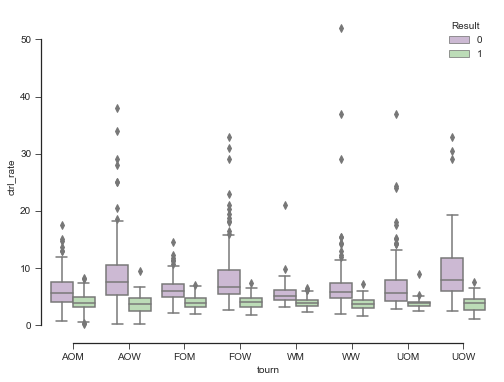

In [48]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 6)
sns.boxplot(x="tourn", y="ctrl_rate", hue="Result", data=matches, palette="PRGn")
sns.despine(offset=4, trim=True)

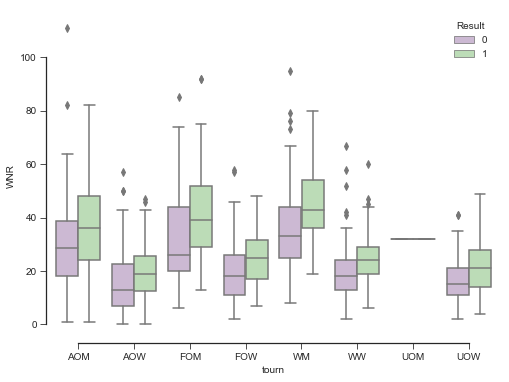

In [49]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 6)
sns.boxplot(x="tourn", y='WNR', hue="Result", data=matches, palette="PRGn")
sns.despine(offset=4, trim=True)

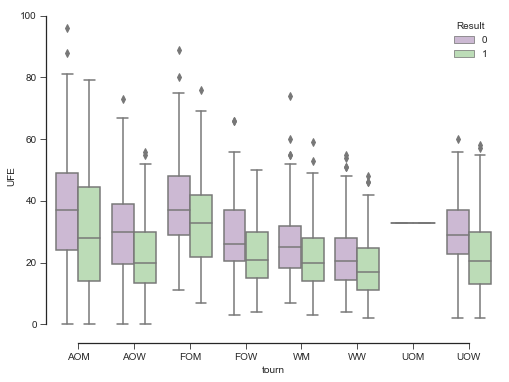

In [50]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 6)
sns.boxplot(x="tourn", y='UFE', hue="Result", data=matches, palette="PRGn")
sns.despine(offset=4, trim=True)

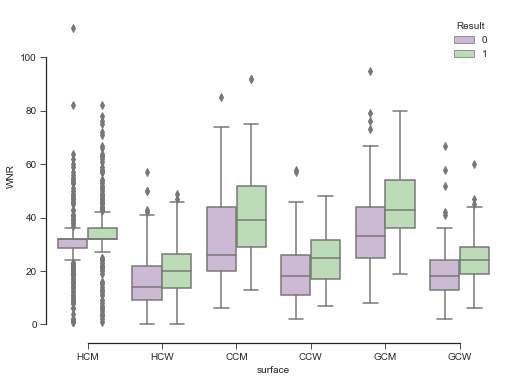

In [51]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 6)
sns.boxplot(x="surface", y='WNR', hue="Result", data=matches, palette="PRGn")
sns.despine(offset=4, trim=True)

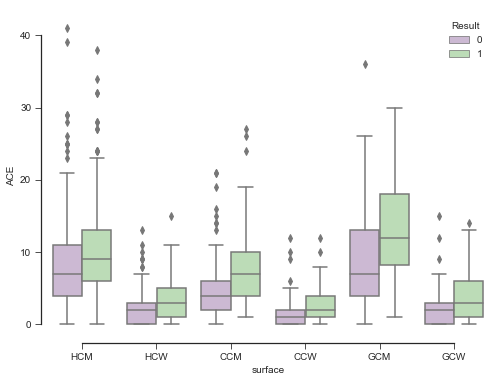

In [52]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 6)
sns.boxplot(x="surface", y='ACE', hue="Result", data=matches, palette="PRGn")
sns.despine(offset=4, trim=True)

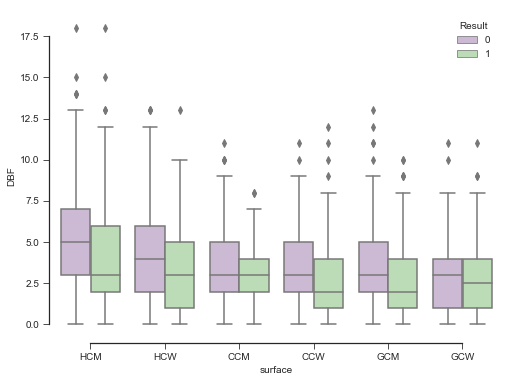

In [53]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 6)
sns.boxplot(x="surface", y='DBF', hue="Result", data=matches, palette="PRGn")
sns.despine(offset=4, trim=True)

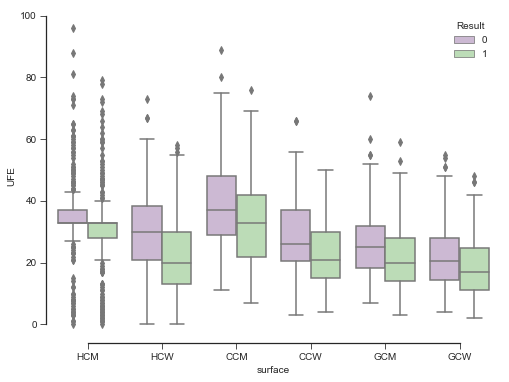

In [54]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(8, 6)
sns.boxplot(x="surface", y='UFE', hue="Result", data=matches, palette="PRGn")
sns.despine(offset=4, trim=True)

In [55]:
from scipy import stats
stats.ttest_ind(matches['HrdCt']==0, matches['HrdCt']==1)


Ttest_indResult(statistic=2.1500027231615011, pvalue=0.031618422167535978)

In [56]:
from scipy import stats
stats.ttest_ind(matches['GrsCt']==0, matches['GrsCt']==1)

Ttest_indResult(statistic=35.399398137030914, pvalue=3.0451473474082031e-237)

In [57]:
from scipy import stats
stats.ttest_ind(matches['ClCt']==0, matches['ClCt']==1)

Ttest_indResult(statistic=32.297276800641875, pvalue=2.988913417399079e-202)

In [58]:
from scipy import stats
stats.ttest_ind(matches['male']==0, matches['male']==1)

Ttest_indResult(statistic=-2.5415304831181524, pvalue=0.011076552236718577)

In [59]:
stats.ttest_ind(fr_open_m['ACE'], wim_open_m['ACE'])

Ttest_indResult(statistic=-8.9974534407618574, pvalue=5.5199398745261386e-18)

In [60]:
# Check correlations ofr tot_gms to TPW for good proxy
print("Australian Open Men 'tot_gms' to 'TPW' correlation: ", aus_open_m['tot_gms'].corr(aus_open_m['TPW']))
print("Australian Open Women 'tot_gms' to 'TPW' correlation: ", aus_open_w['tot_gms'].corr(aus_open_w['TPW']))
print("French Open Men 'tot_gms' to 'TPW' correlation: ", fr_open_m['tot_gms'].corr(fr_open_m['TPW']))
print("French Open Women 'tot_gms' to 'TPW' correlation: ", fr_open_w['tot_gms'].corr(fr_open_w['TPW']))
print("US Open Men 'tot_gms' to 'TPW' correlation: ", us_open_m['tot_gms'].corr(us_open_m['TPW']))

Australian Open Men 'tot_gms' to 'TPW' correlation:  0.8894388628
Australian Open Women 'tot_gms' to 'TPW' correlation:  0.855135485007
French Open Men 'tot_gms' to 'TPW' correlation:  0.904906629595
French Open Women 'tot_gms' to 'TPW' correlation:  0.883664889992
US Open Men 'tot_gms' to 'TPW' correlation:  0.913751151454


# Models

naive Bayes  
Logistic Regression  
Random Forest  
Gradient Boost  
KNN  

### KNN

In [61]:
import sklearn
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.model_selection import cross_val_score

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
knn = neighbors.KNeighborsClassifier(n_neighbors=8)
# Below is the larger set of features that turned out to be overfit
# X = matches[['Sets', 'FSP', 'FSW', 'SSP', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'tot_gms', 'ctrl_fact']]
X = matches[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = matches['Result']
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [63]:
knn_w = neighbors.KNeighborsClassifier(n_neighbors=8, weights='distance')
# X = matches[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = matches['Result']
knn_w.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='distance')

In [64]:
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.63 (+/- 0.08)
Weighted Accuracy: 0.64 (+/- 0.07)


### Naive Bayes

In [65]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X, y)

y_pred = bnb.predict(X)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    X.shape[0],
    (y != y_pred).sum()
))

Number of mislabeled points out of a total 1886 points : 886


### Logistic Regression

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#X = matches[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = matches['Result']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [68]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.673


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[186  90]
 [ 78 212]]


### Random Forest

In [70]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
results = cross_val_score(rfc, X, y, cv=10)
print(results)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


[ 0.63684211  0.68947368  0.68947368  0.64893617  0.7287234   0.61170213
  0.61170213  0.65425532  0.58510638  0.65957447]
10-fold cross validation average accuracy: 0.652


### X = matches[['Sets', 'FSP', 'FSW', 'SSP', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'tot_gms', 'ctrl_fact']]

In [71]:
knn = neighbors.KNeighborsClassifier(n_neighbors=8)
X = wim_open_m[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = wim_open_m['Result']
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [72]:
knn_w = neighbors.KNeighborsClassifier(n_neighbors=8)
X = wim_open_m[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = wim_open_m['Result']
knn_w.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [73]:
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.67 (+/- 0.06)
Weighted Accuracy: 0.67 (+/- 0.06)


In [74]:
knn = neighbors.KNeighborsClassifier(n_neighbors=8)
X = fr_open_m[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = fr_open_m['Result']
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [75]:
knn_w = neighbors.KNeighborsClassifier(n_neighbors=8)
X = fr_open_m[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = fr_open_m['Result']
knn_w.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [76]:
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.66 (+/- 0.16)
Weighted Accuracy: 0.66 (+/- 0.16)


### Wimbledon women

In [77]:
knn = neighbors.KNeighborsClassifier(n_neighbors=8)
X = wim_open_w[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = wim_open_w['Result']
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [78]:
knn_w = neighbors.KNeighborsClassifier(n_neighbors=8)
X = wim_open_w[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = wim_open_w['Result']
knn_w.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [79]:
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.68 (+/- 0.05)
Weighted Accuracy: 0.68 (+/- 0.05)


### French Open Women

In [80]:
knn = neighbors.KNeighborsClassifier(n_neighbors=8)
X = fr_open_w[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = fr_open_w['Result']
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [81]:
knn_w = neighbors.KNeighborsClassifier(n_neighbors=8)
X = fr_open_w[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = fr_open_w['Result']
knn_w.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [82]:
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.71 (+/- 0.09)
Weighted Accuracy: 0.71 (+/- 0.09)


# Logistic Regressions

### Wimbledon Men

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = wim_open_m[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = wim_open_m['Result']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [85]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.660


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[27 13]
 [ 8 21]]


### French Open Men

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = fr_open_m[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = fr_open_m['Result']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [89]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.674


In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[30  4]
 [ 8 33]]


### French Open Women

In [91]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = fr_open_w[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = fr_open_w['Result']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [93]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.792


In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[24 14]
 [11 28]]


### Wimbledon Women

In [95]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = wim_open_w[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = wim_open_w['Result']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [97]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.771


In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[26 12]
 [11 25]]


### Australian Open Men

In [99]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = aus_open_m[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = aus_open_m['Result']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [101]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.677


In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[26 14]
 [ 6 30]]


### US Open Men

In [103]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = us_open_m[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = us_open_m['Result']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [105]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.630


In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[24 16]
 [ 7 29]]


### Australian Open Women

In [107]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = aus_open_w[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = aus_open_w['Result']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [109]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.773


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[23  8]
 [ 8 38]]


### US Open Women

In [111]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = us_open_w[['FSW', 'SSW', 'ACE', 'DBF', 'WNR', 'UFE', 'ctrl_fact']]
y = us_open_w['Result']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [113]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.782


In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[17  6]
 [ 2 21]]
